# Idealized Profiles Notebook

In [383]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw
from importlib import reload

import EV_funcs as ef
import filt_funcs as ff
import MLD_funcs as mf

In [416]:
reload(ef)
reload(ff)
reload(mf)

<module 'MLD_funcs' from '/home/jovyan/argo-intern/MLD_funcs.py'>

#

In [313]:
depth_grid = np.linspace(0,2000,1001)
temp_exp = np.exp(-depth_grid/150)*10
psal_exp = (-np.exp(-depth_grid/550)*2)+35

In [369]:
temp_noise = (1/5)*np.sin((1/25)*(depth_grid))
psal_noise = (1/25)*np.sin((1/40)*(depth_grid-50))

In [370]:
temp_prof = temp_exp + temp_noise[::-1]
psal_prof = psal_exp + psal_noise[::-1]

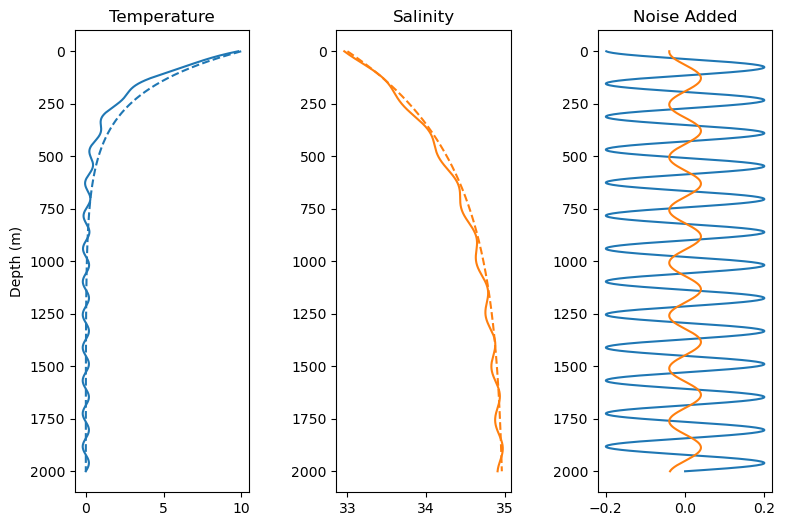

In [371]:
plt.figure(figsize=(9,6))

plt.subplot(131)
plt.plot(temp_prof,  depth_grid,color='tab:blue')
plt.plot(temp_values,depth_grid,color='tab:blue',linestyle='--')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.title('Temperature')

plt.subplot(132)
plt.plot(psal_prof  ,depth_grid,color='tab:orange')
plt.plot(psal_values,depth_grid,color='tab:orange',linestyle='--')
plt.gca().invert_yaxis()
plt.title('Salinity')

plt.subplot(133)
plt.plot(temp_noise[::-1],depth_grid)
plt.plot(psal_noise[::-1],depth_grid)
plt.gca().invert_yaxis()
plt.title('Noise Added')

plt.subplots_adjust(wspace=0.5)

The above plot shows idealized profiles of temperature and salinity, where the overall signal is the sum of a large-scale exponential gradient and small-scale variation from a sine wave. I tried to keep the values somewhat realistic because I will next calculate density and spice for the profile.

In [372]:
dens_prof = gsw.density.rho(psal_prof,temp_prof,depth_grid)
spic_prof = gsw.spiciness0(psal_prof,temp_prof)

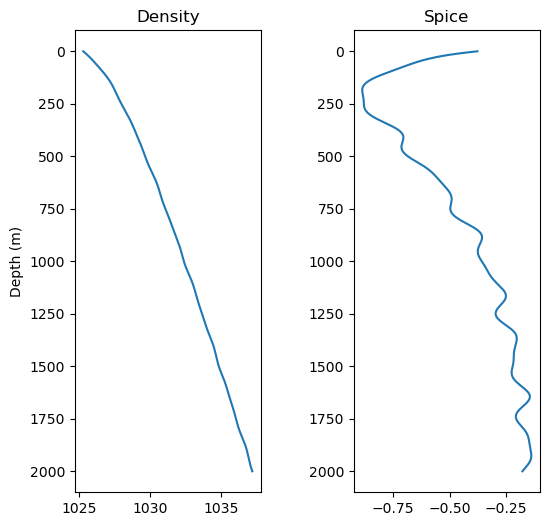

In [373]:
plt.figure(figsize=(6,6))

plt.subplot(121)
plt.plot(dens_prof,depth_grid)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.title('Density')

plt.subplot(122)
plt.plot(spic_prof,depth_grid)
plt.gca().invert_yaxis()
plt.title('Spice')

plt.subplots_adjust(wspace=0.5)

In [407]:
ds = xr.Dataset(coords=dict(profile=(['profile'],np.array([0])),
                           depth=(['depth'],depth_grid),
                           LATITUDE=(['profile'],np.array([0])),
                           LONGITUDE=(['profile'],np.array([0]))),
           data_vars=dict(temperature=(['depth'],temp_prof),
                          salinity=(['depth'],psal_prof),
                          density=(['depth'],dens_prof),
                          spice=(['depth'],spic_prof)))
ds

<xarray.Dataset>
Dimensions:      (depth: 1001, profile: 1)
Coordinates:
  * profile      (profile) int64 0
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 1.996e+03 1.998e+03 2e+03
    LATITUDE     (profile) int64 0
    LONGITUDE    (profile) int64 0
Data variables:
    temperature  (depth) float64 9.801 9.671 9.544 ... 0.03188 0.016 1.62e-05
    salinity     (depth) float64 32.96 32.97 32.97 32.98 ... 34.91 34.91 34.91
    density      (depth) float64 1.025e+03 1.025e+03 ... 1.037e+03 1.037e+03
    spice        (depth) float64 -0.377 -0.3943 -0.4108 ... -0.1764 -0.1777

In [408]:
ds = mf.get_MLD(ds,threshold=0.05,variable='density',dim1='profile',dim2='depth')
ds

<xarray.Dataset>
Dimensions:      (depth: 1001, profile: 1)
Coordinates:
  * profile      (profile) int64 0
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 1.996e+03 1.998e+03 2e+03
    LATITUDE     (profile) int64 0
    LONGITUDE    (profile) int64 0
    MLD          (profile) float64 2.0
Data variables:
    temperature  (depth) float64 9.801 9.671 9.544 ... 0.03188 0.016 1.62e-05
    salinity     (depth) float64 32.96 32.97 32.97 32.98 ... 34.91 34.91 34.91
    density      (depth) float64 1.025e+03 1.025e+03 ... 1.037e+03 1.037e+03
    spice        (depth) float64 -0.377 -0.3943 -0.4108 ... -0.1764 -0.1777

In [409]:
temp_grad = np.gradient(ds.temperature)
psal_grad = np.gradient(ds.salinity)
spic_grad = np.gradient(ds.spice)

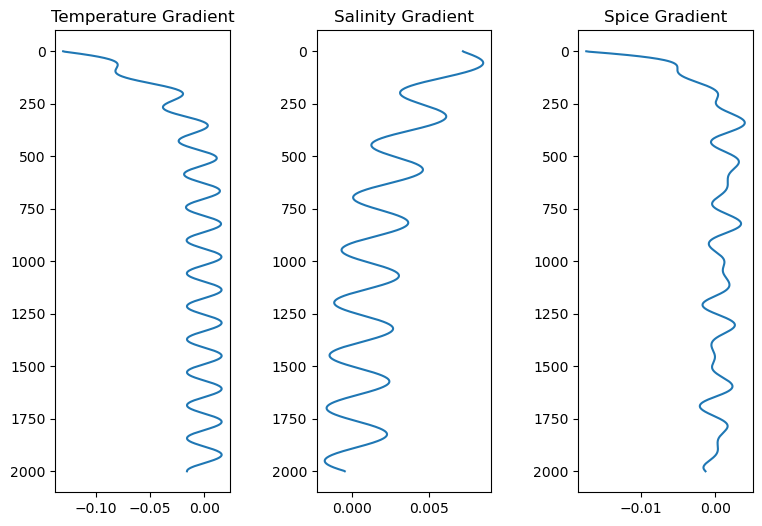

In [410]:
plt.figure(figsize=(9,6))

plt.subplot(131)
plt.plot(temp_grad,depth_grid)
plt.gca().invert_yaxis()
plt.title('Temperature Gradient')

plt.subplot(132)
plt.plot(psal_grad,depth_grid)
plt.gca().invert_yaxis()
plt.title('Salinity Gradient')

plt.subplot(133)
plt.plot(spic_grad,depth_grid)
plt.gca().invert_yaxis()
plt.title('Spice Gradient')

plt.subplots_adjust(wspace=0.5)